# ANN Fish Classification and Prediction;

In this research project, a deep learning model has been developed for the classification of fish species using image data. The primary objective is to construct a robust and accurate model capable of effectively identifying various types of fish from images. This project serves as a portfolio piece to demonstrate proficiency in ML, image processing, and the implementation of ANN.

The project utilizes TensorFlow, a powerful open-source library for machine learning and deep learning, providing a comprehensive ecosystem for building, training, and deploying ML models. TensorFlow is employed to construct the neural network architecture, specifically leveraging the Keras API for creating layers, compiling the model, and fitting the model to the training data.

NumPy, a fundamental package for scientific computing in Python, is utilized for handling and manipulating arrays, particularly for image data and labels. Pandas, a powerful data manipulation and analysis library, is used to read, process, and analyze the dataset containing image paths and corresponding labels. Matplotlib is employed for creating static, animated, and interactive visualizations, enabling the visualization of the training process and evaluation of model performance through accuracy and loss metrics plots.

Seaborn, which provides a high-level interface for drawing attractive statistical graphics, is used to create aesthetically pleasing visualizations, such as heatmaps for confusion matrices. Pillow (PIL) adds image processing capabilities to Python, facilitating the loading and processing of images for input into the model. Keras, as a high-level API for building and training deep learning models, simplifies the model creation process with pre-defined layers and structures, while Scikit-learn provides tools for data mining and analysis, including various algorithms for classification, regression, and clustering, and is utilized for model evaluation metrics.

Finally, ImageDataGenerator is employed for real-time data augmentation, enhancing model 'robustness' (need to thank to George Edward P. Box) by generating modified versions of images during training. The combination of these libraries and tools enables efficient handling, processing, and analysis of image data within this project, showcasing the application of advanced ML techniques and demonstrating the development of practical, real-world applications in the field of computer vision.

## 1. Data Input

The ANN receives data in its input layer. Each input feature is represented as \( x_i \). The input vector can be expressed as:

$$
\mathbf{x} = [x_1, x_2, \ldots, x_n]
$$

## 2. Weight Assignment

A weight \( w_i \) is assigned to each input feature. These weights are updated throughout the learning process of the network. The weight vector is expressed as:

$$
\mathbf{w} = [w_1, w_2, \ldots, w_n]
$$

## 3. Activation Function

The total obtained from the multiplication of inputs and weights is passed through an activation function (e.g., sigmoid, ReLU):

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

Here, \( b \) denotes the bias term. The activation function is defined as follows:

$$
a = f(z)
$$

## 4. Output Calculation

In the final layer, the model's predicted outputs are calculated. The output is obtained using the activation function:

$$
\hat{y} = f(z_{output})
$$

## 5. Loss Function

The difference between the model's predictions and the actual labels is computed using a loss function. For example, the cross-entropy loss used for multi-class classification is defined as:

$$
L(y, \hat{y}) = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$

Here, \( C \) represents the number of classes, \( y_i \) denotes the actual labels, and \( \hat{y}_i \) indicates the predicted labels.

## 6. Backpropagation

The loss is minimized using the backpropagation algorithm to update the model's weights. The weight update is performed as follows:

$$
w_i = w_i - \eta \frac{\partial L}{\partial w_i}
$$

Where \( \eta \) represents the learning rate.


In [114]:

# Downloading Required Libraries;
!pip install tensorflow
import time
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


Elapsed time: 625.206888 seconds


# Dataset Preperation and Labeling;
In this code snippet, the primary objective is to construct a DataFrame that contains paths and labels for images of fish from a specified directory. This is a crucial step in preparing the dataset for subsequent machine learning tasks, particularly for training a deep learning model for image classification. The code begins by recording the start time to evaluate the performance of the process later. It initializes two empty lists, labels and paths, to store the labels and corresponding file paths of the images. The variable fish_dir is defined to specify the directory where the fish dataset is located.

Next, the code uses os.walk to traverse the directory structure, which allows it to navigate through all subdirectories and files within fish_dir. For each file, it checks if the file extension is .png, indicating that it is an image file. Additionally, it filters out any directories named 'GT' to ensure that only relevant images are included in the dataset. When a valid image file is found, its corresponding label (derived from the name of the directory it is contained in) and its file path are appended to their respective lists.

After collecting all paths and labels, the code creates a pandas DataFrame called fish_data, with columns for 'path' and 'label'. It also removes any entries where the label ends with "GT", ensuring that the dataset only contains the desired fish images. The labels are then converted to the 'category' data type to optimize memory usage and improve performance during analysis. The code concludes by printing the value counts of each label to provide an overview of the dataset's distribution and by displaying information about the DataFrame. Finally, it measures the elapsed time for the entire process and prints the first few entries of the DataFrame for verification.


In [115]:

# Dataset Preperation and Labeling;
start_time = time.time()
labels = []
paths = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split('/')[-1] != 'GT':
                labels.append(os.path.split(dir_name)[-1])
                paths.append(os.path.join(dir_name, filename))
fish_data = pd.DataFrame(columns=['path', 'label'])
fish_data['path'] = paths
fish_data['label'] = labels
fish_data = fish_data[~fish_data['label'].str.endswith("GT")]
fish_data['label'] = fish_data['label'].astype('category')
print(fish_data['label'].value_counts())
fish_data.info()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")
print(fish_data.head())


label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   path    9000 non-null   object  
 1   label   9000 non-null   category
dtypes: category(1), object(1)
memory usage: 149.8+ KB
Elapsed time: 0.271626 seconds
                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish

# Analyzing Dataset Information and Identifying Unique Fish Tags;
In this code snippet, the first line fish_data.info() provides a concise summary of the DataFrame, including the number of entries, the number of columns, and the data types of each column. This is essential for understanding the structure and composition of the dataset, enabling the identification of any potential issues such as missing values or incorrect data types. Following that, the unique labels present in the dataset are extracted using fish_data['label'].unique(), which helps in determining the variety of classes available in the dataset. The unique labels are then printed to give a clear view of the different fish categories present, which is crucial for ensuring that the model has a diverse range of labels to learn from. Finally, the elapsed time is calculated and displayed to track the performance of this section of the code, indicating how long it took to execute these operations.

In [116]:

# Analyzing Dataset Information and Identifying Unique Fish Tags;
fish_data.info()
# Don't show unique fish tags;
unique_labels = fish_data['label'].unique()
print("Unique Labels:", unique_labels)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   path    9000 non-null   object  
 1   label   9000 non-null   category
dtypes: category(1), object(1)
memory usage: 149.8+ KB
Unique Labels: ['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
Categories (9, object): ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', ..., 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
Elapsed time: 2.330805 seconds


# Visualization of a Dataset;
This code aims to visualize sample images of each unique label in the fish dataset. First, a 3x3 grid of subplots is created, providing enough space to display a total of nine images. A loop iterates over the unique labels obtained from fish_data['label'].unique(), and for each label, the corresponding image is read from the dataset and placed into the subplots. Each subplot is titled with the label of the displayed image. This visualization allows users to quickly see different fish species in the dataset and verify the accuracy of the labels. Once the process is complete, the elapsed time is also calculated and printed as output.

Elapsed time: 5.557479 seconds


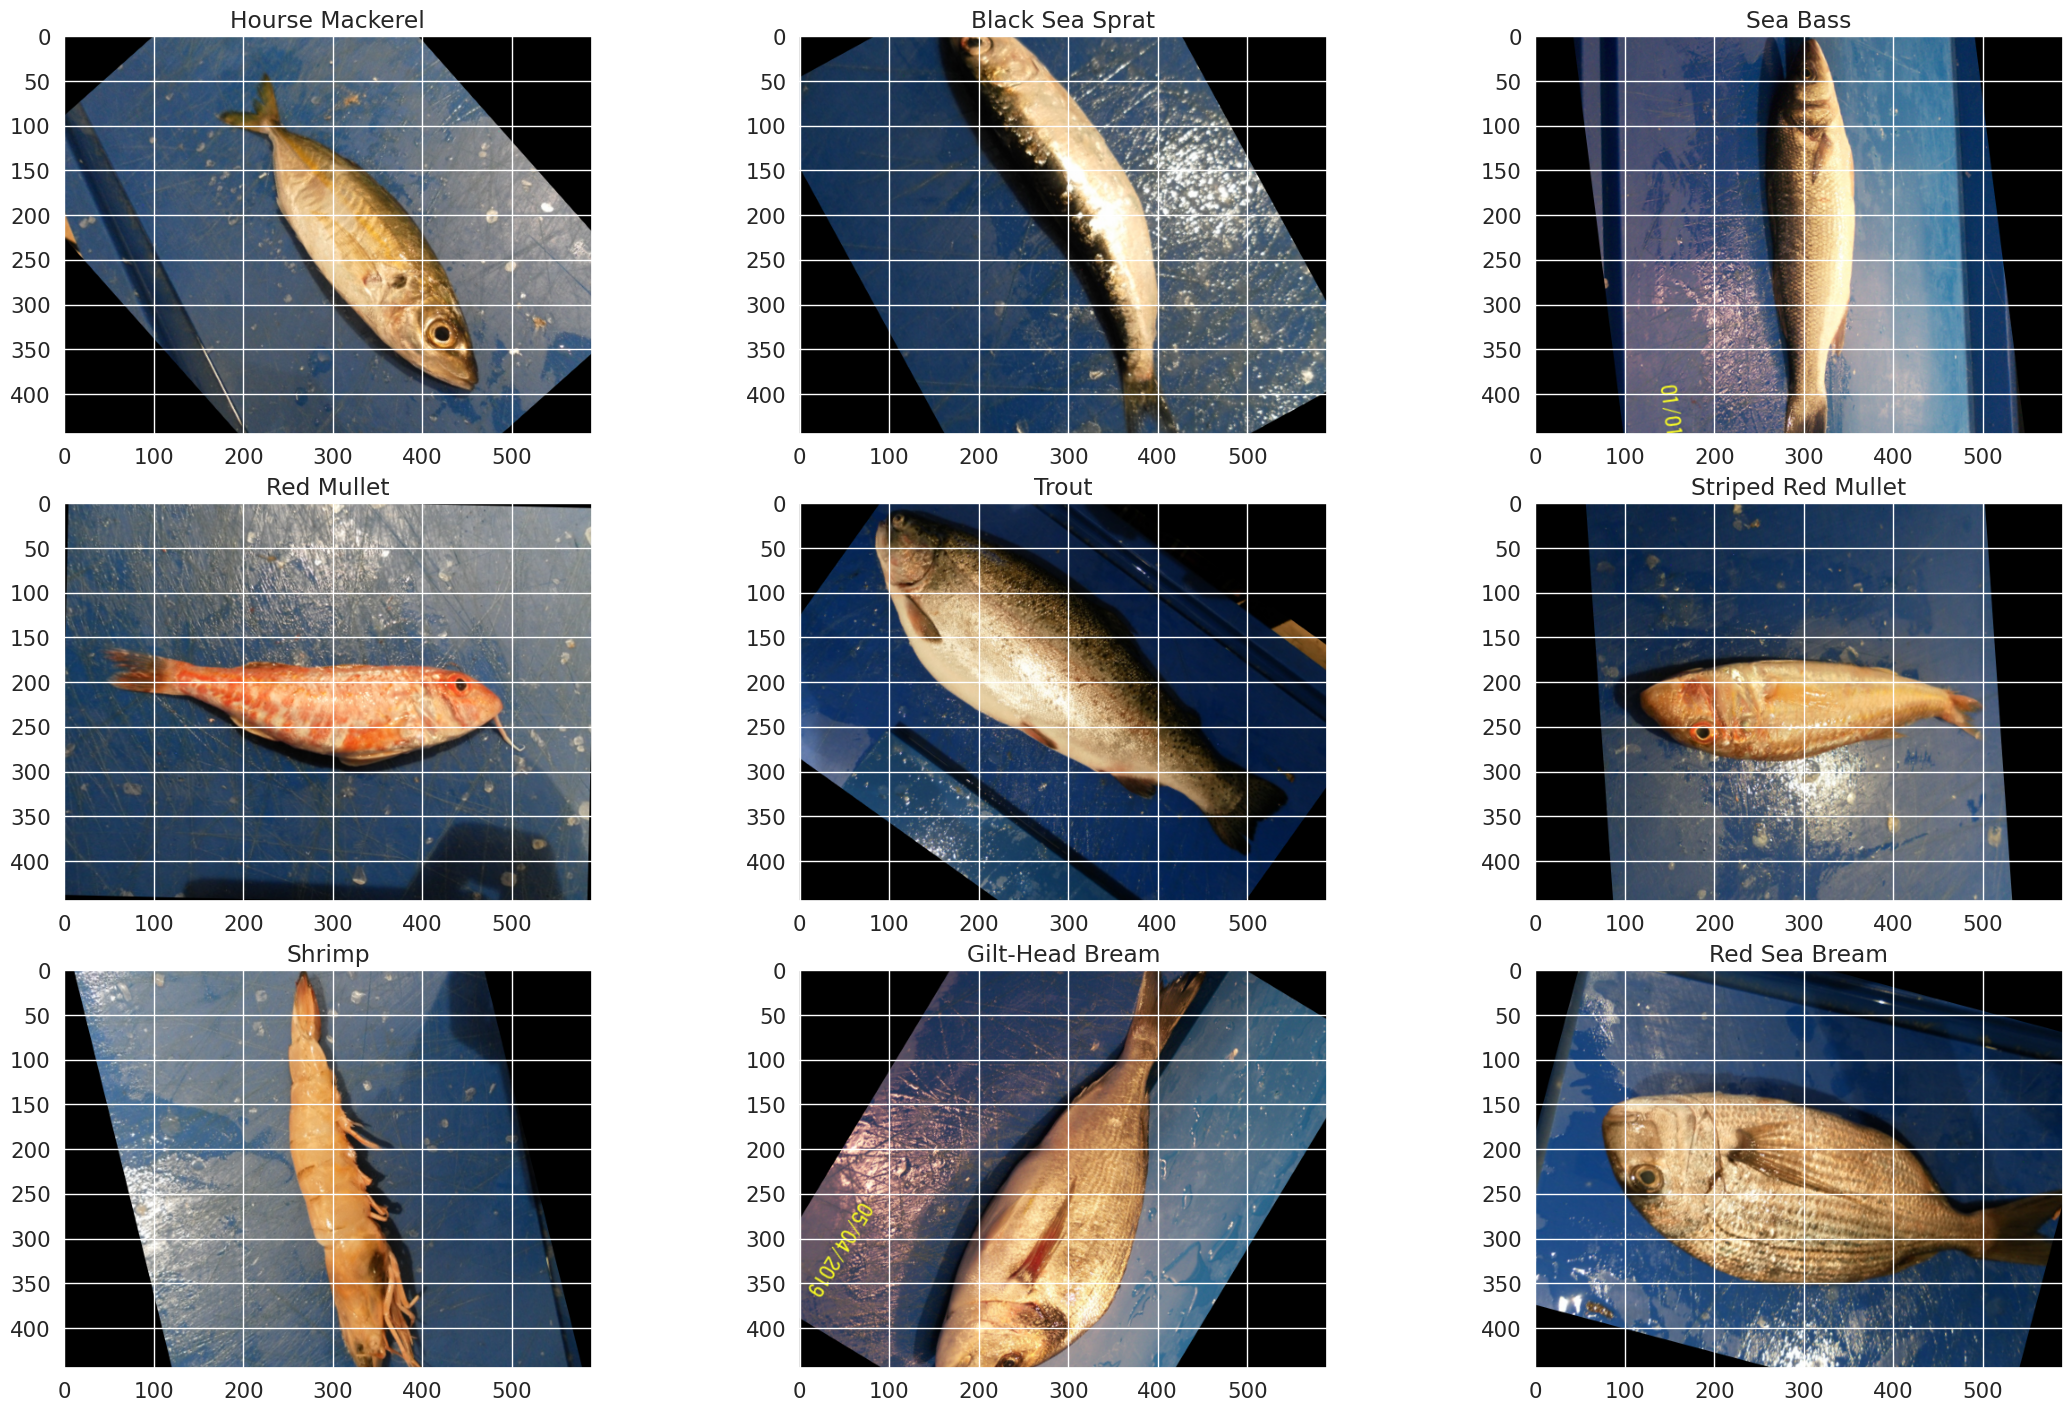

In [117]:

# Visualization of a Dataset;
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(22, 14), constrained_layout=True)
ax = ax.flatten()
j = 0
for i in fish_data['label'].unique():
    ax[j].imshow(plt.imread(fish_data[fish_data['label'] == i].iloc[0, 0]))
    ax[j].set_title(i)
    j += 1
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")    


# Splitting Dataset into Training and Testing Sets;
This code snippet is responsible for separating the features and labels from the fish_data DataFrame. The variable X is created to hold the image file paths and their corresponding labels. Next, the dataset is divided into training and testing sets using the train_test_split function from the sklearn.model_selection library. A test size of 25% is specified, meaning that 75% of the data will be used for training, and 25% will be reserved for testing. The random_state parameter is set to 42 to ensure reproducibility of the results across different runs. Finally, the shapes of the training and testing sets are printed to provide an overview of the data distribution. The elapsed time for this process is also calculated and printed as output.

This step is crucial for the Separation of the ANN project's data set into Train and Test and related parameter settings, enabling the accurate identification of different fish categories during the model training and evaluation phases.

In [118]:

# Separating properties and labels;
X = fish_data[['path', 'label']]

# Separation into training and test set;
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


(6750, 2)
(2250, 2)
Elapsed time: 34.984850 seconds


# Deep Learning Model Creation and Training for Fish Species Classification;
This code snippet aims to create and train a DL image classification model using TensorFlow and Keras. Initially, the necessary libraries, including TensorFlow, Keras, NumPy, and Pandas, are imported to facilitate the model development process. Fish images and their corresponding labels are collected for use as training and testing data, with the file paths of the images and their labels being organized into a DataFrame. During this process, the labels are converted to a categorical data type, ensuring that they are appropriately formatted for classification tasks, and the counts of unique labels are displayed to provide an overview of the dataset's distribution.

Subsequently, the image data is split into training and testing sets, allowing the model to learn from one portion of the data while being evaluated on another. In the model creation phase, a pre-trained MobileNetV2 model is utilized, and its layers are frozen to perform transfer learning. This approach leverages the features learned from a larger dataset, enhancing the model's ability to generalize. The input and output layers of the model are defined, including two dense layers with ReLU activation and a dropout layer to mitigate overfitting. The model is then compiled with a loss function and optimization algorithm suitable for multi-class classification, specifically sparse categorical cross-entropy and the Adam optimizer.

During the training phase, the training time is measured while the model is trained on the training data, with 25% of the data reserved for validation purposes. The accuracy of the model is monitored throughout the training process, and results are printed to the screen to provide real-time feedback on performance. This structured approach enables the model to effectively learn from the data, ultimately gaining the ability to identify specific fish species accurately.


In [119]:

# Using the MobileNetV2 pre-trained model;
pre_trained = MobileNetV2(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze layers of the pre-trained model;
pre_trained.trainable = False
inp_model = pre_trained.input
x = Dense(128, activation='relu')(pre_trained.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(np.unique(y_train_encoded)), activation='softmax')(x)

# Model creation;
model = Model(inputs=inp_model, outputs=output)

# Model compilation;
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the Model;
start_time = time.time()
history = model.fit(X_train_img, y_train_encoded,
                    validation_split=0.25,  # Let's evaluate the performance of the model with a certain proportion of the training data.
                    epochs=10, # To see the parameters once every 5 iterations.
                    batch_size=32, # Let's use 32 examples at the same time in each training step to make the model learn more efficiently.
                    verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 145s 872ms/step - accuracy: 0.6375 - loss: 1.0694 - val_accuracy: 0.9840 - val_loss: 0.0597
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 139s 854ms/step - accuracy: 0.9522 - loss: 0.1487 - val_accuracy: 0.9911 - val_loss: 0.0267
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 147s 887ms/step - accuracy: 0.9714 - loss: 0.0785 - val_accuracy: 0.9953 - val_loss: 0.0144
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 136s 855ms/step - accuracy: 0.9787 - loss: 0.0590 - val_accuracy: 0.9988 - val_loss: 0.0068
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 137s 860ms/step - accuracy: 0.9814 - loss: 0.0595 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 135s 848ms/step - accuracy: 0.9848 - loss: 0.0439 - val_accuracy: 0.9982 - val_loss: 0.0091
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 140s 879ms/step - accuracy: 0.9807 - loss: 0.0518 - val_accuracy: 0.9982 - val_loss: 0.0059
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 139s 874ms/step - accuracy: 0.9805 -

A few points that come to mind when looking at the predictions made on education data during the education process are as follows:

-The learning process begins with the model's weights being assigned randomly at first and then starts learning from the data during the training process.

-Weight updates occur at the end of each epoch, where the model's weights are updated using the loss function.

-Data augmentation can assist the model in learning more robustly and help increase accuracy rapidly.

-Finally, it's important to remember that the initial values for weights are generally small random values.

# Model Performance Visualization;
This code snippet aims to visualize the performance metrics of the trained deep learning model using Matplotlib. After training the model, the results, including accuracy and loss, are stored in a DataFrame called result. Two subplots are created within a single figure to display the model's accuracy and loss over the training epochs.

In the first subplot, the training accuracy and validation accuracy are plotted against the number of epochs. The graph is labeled appropriately, with titles, axis labels, and a legend for clarity. Additionally, a grid is added to enhance readability.

The second subplot visualizes the training loss and validation loss across the same epochs. Similar to the accuracy plot, it includes a title, axis labels, a legend, and a grid for improved clarity.

Overall, this visualization helps to understand how well the model is performing during training and how it generalizes to the validation set over the epochs. The elapsed time for this operation is also calculated and displayed.

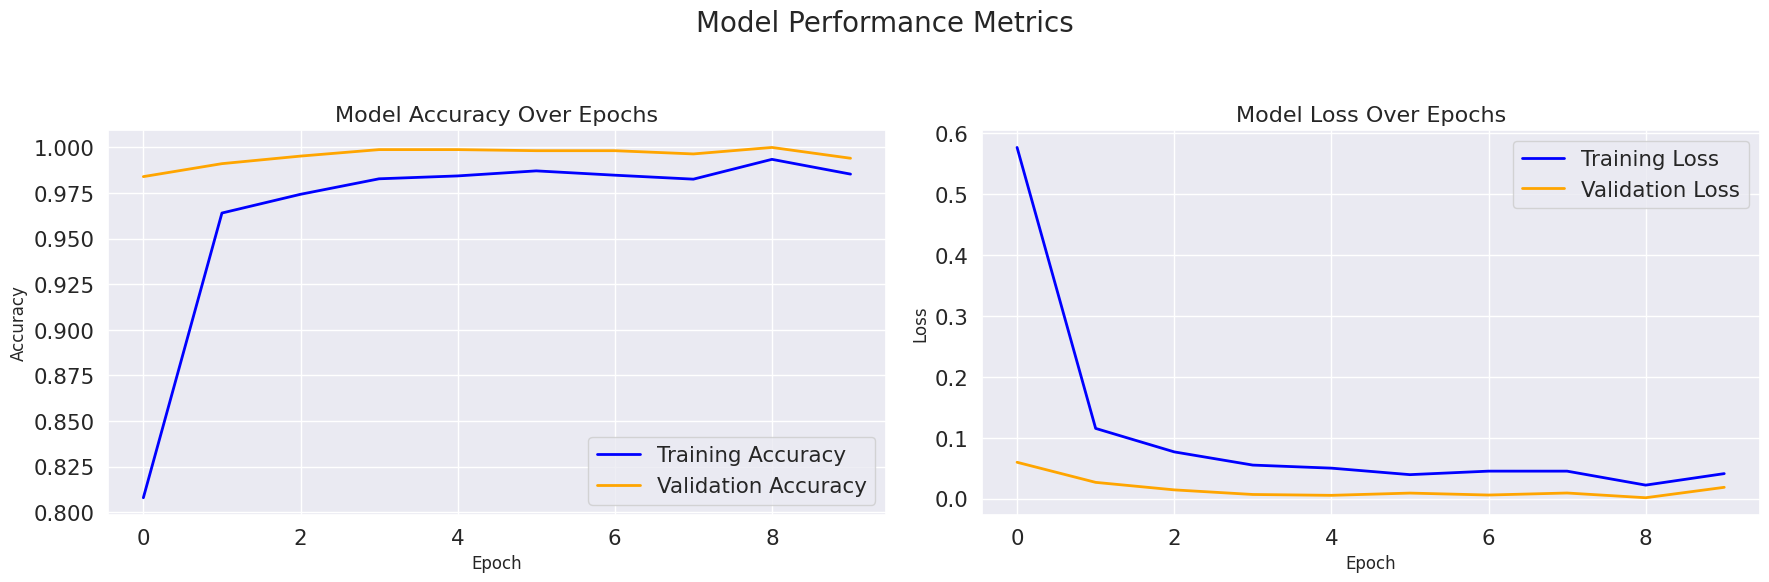

Elapsed time: 1434.758184 seconds


In [120]:

# Description;
result = pd.DataFrame(history.history)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax = ax.flatten()

# Accuracy Graph;
ax[0].plot(result['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax[0].plot(result['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
ax[0].set_title("Model Accuracy Over Epochs", fontsize=16)
ax[0].set_xlabel("Epoch", fontsize=12)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].legend(loc="lower right")
ax[0].grid(True)

# Loss Graph;
ax[1].plot(result['loss'], label='Training Loss', color='blue', linewidth=2)
ax[1].plot(result['val_loss'], label='Validation Loss', color='orange', linewidth=2)
ax[1].set_title("Model Loss Over Epochs", fontsize=16)
ax[1].set_xlabel("Epoch", fontsize=12)
ax[1].set_ylabel("Loss", fontsize=12)
ax[1].legend(loc="upper right")
ax[1].grid(True)

# Some Modifications for Visualization;
plt.suptitle("Model Performance Metrics", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


# Model Prediction and Confusion Approach;

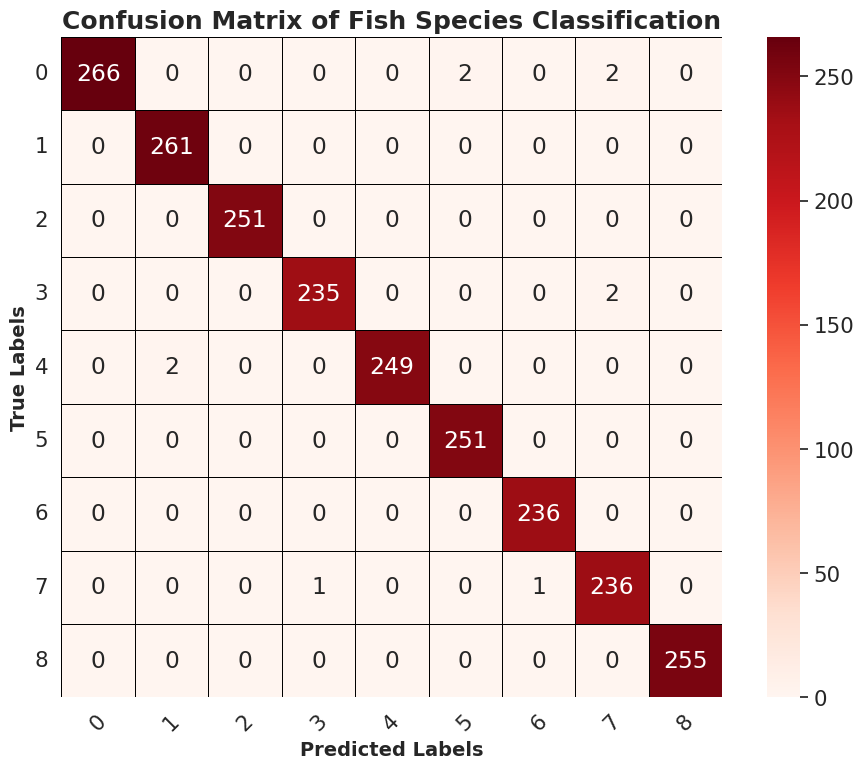

Elapsed time: 1520.368891 seconds


In [121]:

conf_matrix = confusion_matrix(y_test_encoded, pred_classes)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels=class_names, yticklabels=class_names, 
            cbar=True, square=True, linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix of Fish Species Classification", fontsize=18, weight='bold')
plt.ylabel('True Labels', fontsize=14, weight='bold')
plt.xlabel('Predicted Labels', fontsize=14, weight='bold')
plt.xticks(rotation=45)  # Rotate X-axis labels.
plt.yticks(rotation=0)   # Do not keep the Y-axis labels straight.
plt.tight_layout()
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


# Predicting Images in the Test Set and Organizing Results;
First, the predicted probabilities for the images in the test set are stored in the pred_probs variable using model.predict(X_test_img). Then, the highest classes among these probabilities are assigned to the pred_classes variable using np.argmax(pred_probs, axis=1).

Next, a DataFrame (results) is created that includes the image paths, true labels, and predicted labels. The true labels are mapped to match the labels in the training set. Finally, the first five rows of the results are printed, and the elapsed time is calculated and displayed.v

The fundamental steps involved in predicting the probabilities for the images in a test set using a deep learning model are outlined below.

1. **Model Predicting on Images**:
   The model's `predict` function performs predictions on the images in the test set. This operation can be represented mathematically as:
   
   \[
   \text{pred\_probs} = \text{model.predict}(X_{\text{test\_img}})
   \]

   Where:
   - \( X_{\text{test\_img}} \): Represents the features of the images in the test set.
   - \( \text{pred\_probs} \): An array containing the predicted probabilities for each image.

2. **Selecting the Class with the Highest Probability**:
   The `argmax` function is used to select the highest probabilities among the predicted values:
   
   \[
   \text{pred\_classes} = \text{argmax}(\text{pred\_probs}, \text{axis}=1)
   \]

   Where:
   - \( \text{pred\_classes} \): An array containing the classes with the highest probabilities.
   - `axis=1`: Indicates that the operation will be performed along the rows to find the maximum probability for each image.

These steps enable the calculation of the predicted probabilities for the images in the test set.

In [122]:

# Prediction;
pred_probs = model.predict(X_test_img)
pred_classes = np.argmax(pred_probs, axis=1)

# Adding to df;
results = pd.DataFrame({
    'path': X_test['path'].values,
    'label': y_test_encoded,
    'pred': pred_classes
})
results['label'] = results['label'].map({i: label for i, label in enumerate(np.unique(y_train_encoded))})
print(results.head())
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 661ms/step
                                                path  label  pred
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...      3     3
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...      0     0
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...      3     3
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...      4     1
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...      1     1
Elapsed time: 1954.883502 seconds


## Calculation and Visualization of Test Set Accuracy

This code snippet is designed to calculate the accuracy of a deep learning model on the test set and visualize the correctly predicted fish images.

1. **Recording the Start Time**: 
   The code records the current time in the `start_time` variable to measure the elapsed time of the process.

2. **Calculating Accuracy**:
   Two methods are used to calculate the accuracy on the test set:
   - First, the overall accuracy is computed by checking the equality of true labels and predicted labels in the `results` DataFrame. This accuracy is calculated using the `np.mean()` function and printed as the result.
   
   \[
   \text{accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
   \]

   - Next, the accuracy is recalculated using the `sklearn` library. This is done using the `accuracy_score` function, and the result is printed again.

3. **Visualizing Correctly Predicted Images**:
   The correctly predicted fish images are filtered into a `correct_predictions` DataFrame. These images are visualized in a subplot with 2 rows and 3 columns.
   - The first six correct prediction images are displayed in a loop. For each image, the true and predicted labels are shown as titles.
   - Gridlines are added between images for better visual organization.

4. **Calculating Elapsed Time**:
   The code records the current time again in the `end_time` variable to calculate the total processing time, which is then assigned to the `elapsed_time` variable. The result is printed.

This process is crucial for evaluating the model's performance on the test set and analyzing the model's outputs through the visualization of correct predictions.


Test set accuracy: 0.9933
Test set accuracy (using sklearn): 0.9933


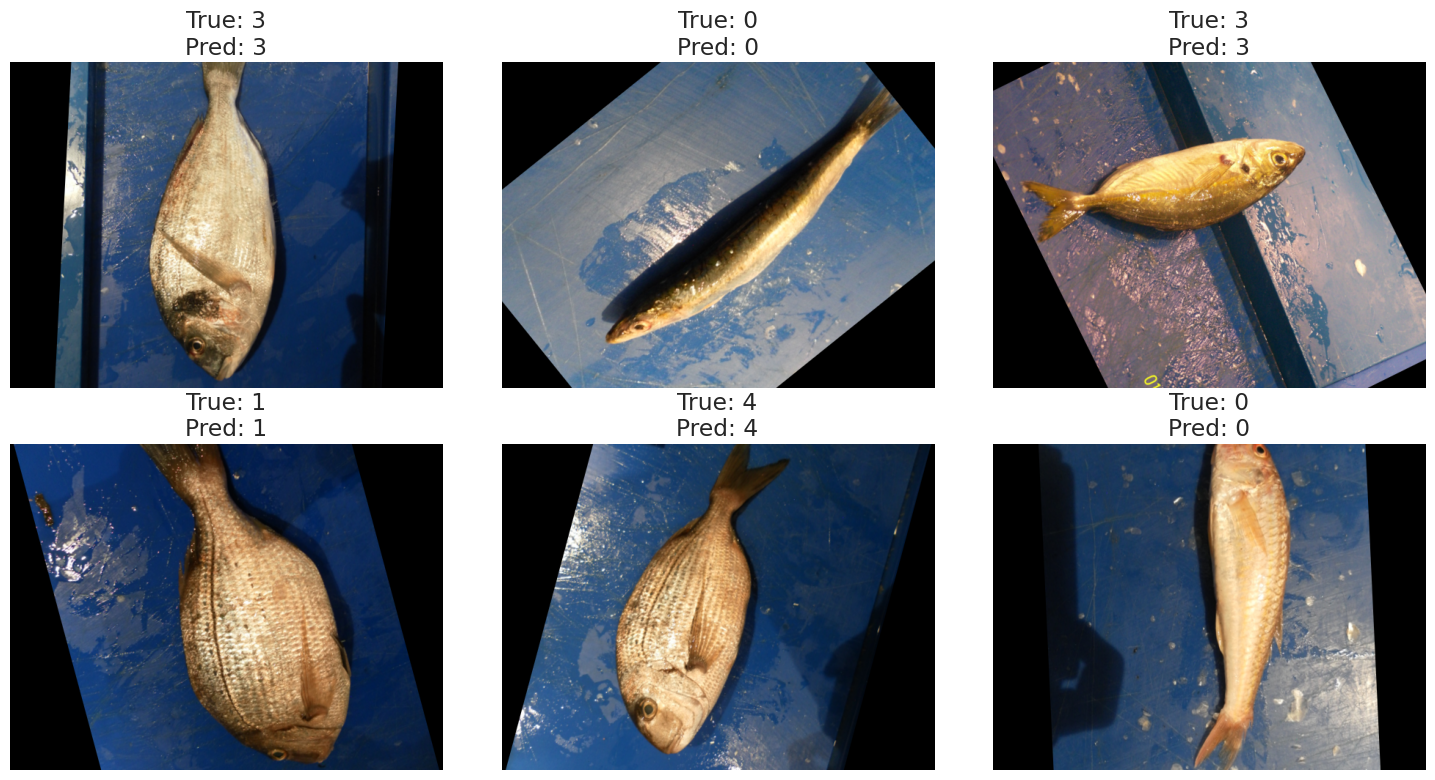

Elapsed time: 2.241163 seconds


In [123]:

start_time = time.time()
# Calculate the accuracy of the test set;
accuracy = np.mean(results['label'] == results['pred'])
print(f"Test set accuracy: {accuracy:.4f}")

# True labels and predicted labels;
true_labels = results['label'].values
predicted_labels = results['pred'].values

# Calculate accuracy using sklearn;
accuracy_sklearn = accuracy_score(true_labels, predicted_labels)
print(f"Test set accuracy (using sklearn): {accuracy_sklearn:.4f}")

# Visualize the correctly predicted fish images;
correct_predictions = results[results['label'] == results['pred']]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()

for i in range(min(6, len(correct_predictions))):
    ax[i].imshow(plt.imread(correct_predictions['path'].values[i]))
    ax[i].set_title(f"True: {correct_predictions['label'].values[i]}\nPred: {correct_predictions['pred'].values[i]}")
    ax[i].axis('off')
    ax[i].grid(True)
plt.tight_layout()
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")


The accuracy of the test set is reported as 0.9933, which indicates that the model correctly predicted approximately 99.33% of the samples in the test set. This high accuracy suggests that the model is performing exceptionally well, effectively distinguishing between different fish species based on the features provided.

Furthermore, the fact that the accuracy calculated manually and the accuracy computed using the sklearn library both yield the same result (0.9933) reinforces the reliability of the calculations. This consistency indicates that the methods used for evaluating accuracy are aligned and that the model's performance is robust across different evaluation techniques.

Overall, such a high accuracy is encouraging and suggests that the model has effectively learned the underlying patterns in the data. However, it is also essential to evaluate other performance metrics, such as precision, recall, and F1-score, especially if the dataset is imbalanced, to ensure that the model performs well across all classes.